<a href="https://colab.research.google.com/github/aishwary247/ML/blob/main/LogisticReg(NR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Logistic Regression using Newton's Method

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [ ]:
df_X = pd.read_csv('/content/logisticX.csv')
df_y = pd.read_csv('/content/logisticY.csv')

In [ ]:
X = df_X.to_numpy()
y = df_y.to_numpy()
X.shape, y.shape

((99, 2), (99, 1))

In [ ]:
#normalising
mean1 = np.mean(X[:,0])
std1 = np.std(X[:,0])
mean2 = np.mean(X[:,1])
std2 = np.std(X[:,1])

X[:,0] = (X[:,0]-mean1)/std1
X[:,1] = (X[:,1]-mean2)/std2


In [ ]:
X[:5]

array([[-0.70739532,  1.49166385],
       [-1.39759229,  2.13781242],
       [-1.14266896,  0.89423113],
       [-1.28516611,  0.64964747],
       [-0.72243081,  1.37364094]])

In [ ]:
ones = np.ones((99,1))
X = np.hstack((ones,X))
X.shape, X[:5]

((99, 3),
 array([[ 1.        , -0.70739532,  1.49166385],
        [ 1.        , -1.39759229,  2.13781242],
        [ 1.        , -1.14266896,  0.89423113],
        [ 1.        , -1.28516611,  0.64964747],
        [ 1.        , -0.72243081,  1.37364094]]))

In [ ]:
theta = np.array([[1],[2],[3]])

In [ ]:
def h(theta,X):
  var = np.matmul(X,theta)
  return 1/(1+np.exp(-var))

In [ ]:
def gradient(theta,X,y):
  return np.matmul(X.T, (h(theta,X)-y))

In [ ]:
def llhood(theta,X,y):
  return y.T @ np.log(h(theta,X)) + (1-y).T @ np.log(1-h(theta,X))

In [ ]:
def hessian(theta,X):
  return X.T @ (h(theta,X)*((1-h(theta,X))*X))

In [ ]:
def Newton_method(theta,X,y,epochs,b_con):
  epoch = 0
  while True :

    cost = llhood(theta,X,y)
    theta = theta - np.linalg.inv(hessian(theta,X)) @ gradient(theta,X,y)

    new_cost = llhood(theta,X,y)
    if abs(new_cost- cost)< b_con :
      break

    epoch += 1
    print("epoch: " + str(epoch), end = " ")
    print(cost)

    if epoch == epochs :
      break

    cost = new_cost

  return theta

In [ ]:
theta_t = [[0],[0],[0]]

In [ ]:
theta = Newton_method(theta_t, X,y,10,1e-10)

epoch: 1 [[-68.62157088]]
epoch: 2 [[-32.88441667]]
epoch: 3 [[-25.20105278]]
epoch: 4 [[-22.794917]]
epoch: 5 [[-22.33594005]]
epoch: 6 [[-22.3082628]]
epoch: 7 [[-22.30811739]]


In [ ]:
theta

array([[ 0.46722676],
       [ 2.55770122],
       [-2.78143761]])

In [ ]:
len(y)

99

In [ ]:
x1_y0 = [X[i][1] for i in range(len(y)) if y[i][0]== 0 ]
x2_y0 = [X[i][2] for i in range(len(y)) if y[i][0]== 0 ]
x1_y1 = [X[i][1] for i in range(len(y)) if y[i][0]== 1 ]
x2_y1 = [X[i][2] for i in range(len(y)) if y[i][0]== 1 ]

len(x1_y0), len(x2_y0), len(x1_y1), len(x2_y1)




(49, 49, 50, 50)

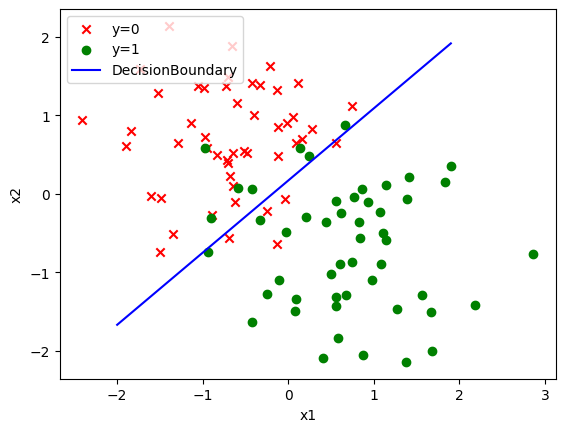

In [ ]:
plt.scatter(x1_y0, x2_y0, marker='x', color='red', label = 'y=0')
plt.scatter(x1_y1, x2_y1, marker='o', color='green', label = 'y=1')

xvalues = np.arange(-2,2,0.1)
yvalues = -(theta[0]+theta[1]*xvalues)/theta[2]
plt.plot(xvalues,yvalues, color = 'blue' ,label="DecisionBoundary" )
plt.xlabel('x1')
plt.ylabel('x2')

plt.legend()
plt.show()